## 5.9 バックプロパゲーションの実装 -回帰-

### 正解データと入力データの形状を確認

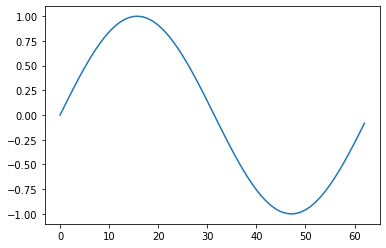

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261 -0.95892427 -0.92581468 -0.88345466 -0.83226744
 -0.77276449 -0.70554033 -0.63126664 -0.55068554 -0.46460218 -0.37387666
 -0.2794155  -0.1821625  -0.0830894 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -- 入力と正解の用意 --
input_data = np.arange(0, np.pi*2, 0.1)  # 入力
correct_data = np.sin(input_data)  # 正解

# グラフに描画してみる
plt.plot(correct_data)
plt.show()

# 正解データの内容
print(correct_data)

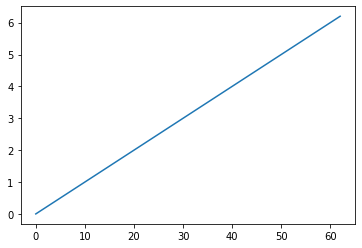

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2]


In [ ]:
# 入力データ
input_data = np.arange(0, np.pi*2, 0.1)  # 入力
# グラフに描画してみる
plt.plot(input_data)
plt.show()

# 入力データの内容
print(input_data)

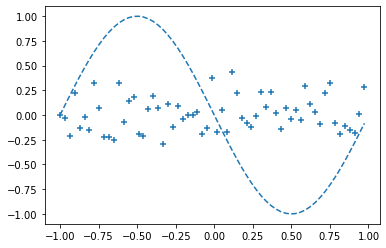

Epoch:0/2001 Error:0.2822324024399211


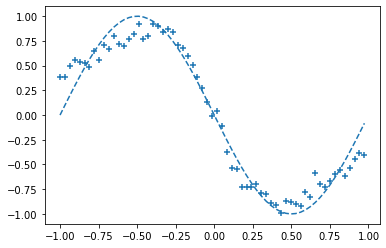

Epoch:200/2001 Error:0.010821651667733988


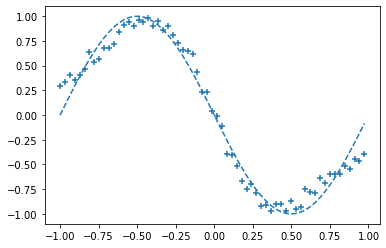

Epoch:400/2001 Error:0.00712921024960331


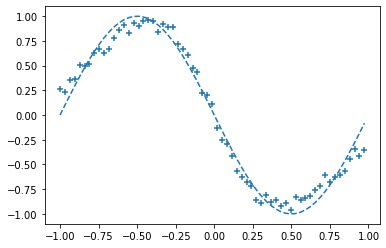

Epoch:600/2001 Error:0.005546821653517881


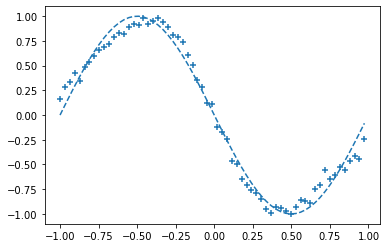

Epoch:800/2001 Error:0.004600187795554538


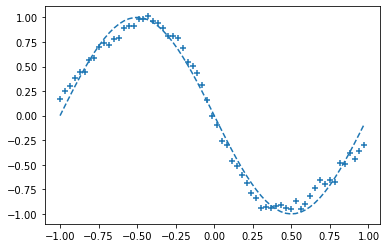

Epoch:1000/2001 Error:0.0038682542092584623


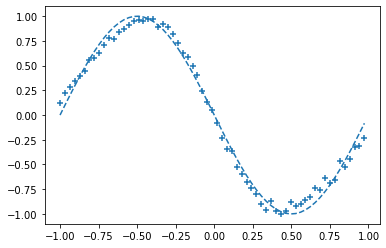

Epoch:1200/2001 Error:0.002670938590304869


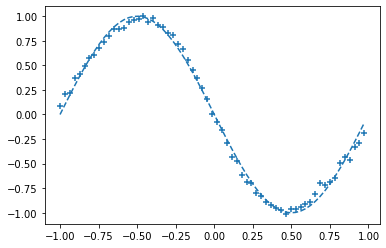

Epoch:1400/2001 Error:0.0012945113286563488


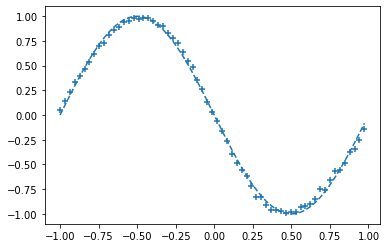

Epoch:1600/2001 Error:0.0006258634933734719


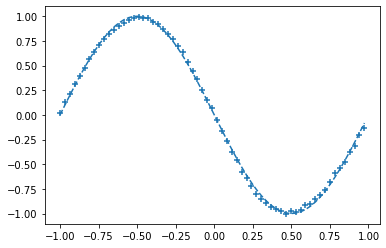

Epoch:1800/2001 Error:0.00026598563934572057


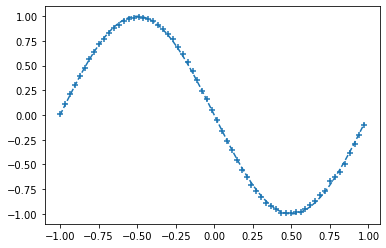

Epoch:2000/2001 Error:9.056676347204446e-05


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# -- 入力と正解の用意 --
input_data = np.arange(0, np.pi*2, 0.1)  # 入力
correct_data = np.sin(input_data)  # 正解
input_data = (input_data-np.pi)/np.pi  # 入力を-1.0-1.0の範囲に収める
n_data = len(correct_data)  # データ数

# -- 各設定値 --
# 入力層のニューロン数
n_in = 1
# 中間層のニューロン数
n_mid = 3
# 出力層のニューロン数
n_out = 1

wb_width = 0.01  # 重みとバイアスの広がり具合
# 学習係数
eta = 0.1
epoch = 2001
# 経過の表示間隔
interval = 200 

# -- 中間層 --
class MiddleLayer:
    # 初期設定
    # self の使い方を忘れた人は調べておきましょう
    def __init__(self, n_upper, n):  
        self.w = wb_width * np.random.randn(n_upper, n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  # バイアス（ベクトル）

    # 順伝播
    def forward(self, x):
        self.x = x
        # u に入力と重みの積＋バイアスを代入
        u = np.dot(x, self.w) + self.b
        # シグモイド関数
        self.y = 1/(1+np.exp(-u))
    
    # 逆伝播
    def backward(self, grad_y):  
        # シグモイド関数の微分（P159）
        # 中間層からの出力の勾配 * (1 - 中間層からの出力) * 中間層からの出力
        delta = grad_y * (1-self.y)*self.y
        
        # バッチ対応した重みの勾配（P173）
        self.grad_w = np.dot(self.x.T, delta)
        # バッチ対応したバイアスの勾配
        self.grad_b = np.sum(delta, axis = 0)
        # バッチ対応した入力の勾配
        self.grad_x = np.dot(delta, self.w.T)
    
    # 重みとバイアスの更新
    def update(self, eta):  
        # 重みの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

# -- 出力層 --
class OutputLayer:
    def __init__(self, n_upper, n):  # 初期設定
        # 重み（行列）
        self.w = wb_width * np.random.randn(n_upper, n)
        # バイアス（ベクトル）
        self.b = wb_width * np.random.randn(n) 
    
    def forward(self, x):  # 順伝播
        self.x = x
        u = np.dot(x, self.w) + self.b
        # 恒等関数
        self.y = u
    
    def backward(self, t):  # 逆伝播
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):  # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b


# -- 各層の初期化 --
# インスタンス化
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# -- 学習 --
# 学習回数＝エポック数
for i in range(epoch):

    # インデックスをシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 結果の表示用
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 入力
        t = correct_data[idx:idx+1]  # 正解
        
        # 順伝播
        middle_layer.forward(x.reshape(1, 1))  # 入力を行列に変換
        output_layer.forward(middle_layer.y)  

        # 逆伝播
        # 正解データを行列に変換し、output_layer.backwardの引数とする
        output_layer.backward(t.reshape(1, 1))  
        middle_layer.backward(output_layer.grad_x)
        
        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)
        
        # interval回数ごとに以下のifの中を実行
        if i % interval == 0:

            # 行列をベクトルに戻す
            y = output_layer.y.reshape(-1)  

            # 誤差の計算（二乗和誤差）
            total_error +=  1/2 * np.sum(np.square(y - t))
            
            # 出力の記録
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 出力のグラフ表示
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # エポック数と誤差の表示
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))